In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

## Cox proportional hazard model
- A regression model used by medical researchers to find the relationship between survival time and one or more predictor variables.
- Kaplan-Meier, Nelson-Aalen, and Log-Rank test are only able to consider one variable at a time. 
- Also notice we were performing operations only on categorical variables like sex. Cox proportional hazard regressions work for categorical and numerical variables.
- Definition:
    - h(t) = h0(t) & exp(b1x1 + b2x2 + ... + bnxn)
    - exp(n) is the hazard ratio.

In [2]:
data = pd.read_csv("lung.csv")
data =  data.drop(["Unnamed: 0"],axis=1)
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [3]:
data.columns

Index(['inst', 'time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno',
       'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [4]:
data= data.dropna(subset=['inst', 'time', 'status', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'])

data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


In [5]:
kmf = KaplanMeierFitter() 

In [6]:
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0,1.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0,1.0


In [7]:
# 1st arg: array or pd.Series of individual survival times
# 2nd arg: array or pd.Series, indicates if event of interest occurred 

kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 167 total observations, 47 right-censored observations>

In [8]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,167,167
5.0,1,1,0,0,167
11.0,1,1,0,0,166
12.0,1,1,0,0,165
13.0,1,1,0,0,164
...,...,...,...,...,...
814.0,1,1,0,0,5
821.0,1,0,1,0,4
840.0,1,0,1,0,3


In [9]:
from lifelines import CoxPHFitter

In [10]:
data = data[[ 'time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'dead']]

In [11]:
cph = CoxPHFitter()
cph.fit(data,"time",event_col="dead")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2021-02-24 18:29:29 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

              z      p   -log2(p)
covariate                        
age        0.93   0.35       1.51
sex       -2.75   0.01       7.37
ph.ecog    3.29 <0.005       9.95
ph.karno   2.00   0.05       4.45
pat.karno -1.49   0.14       2.87
meal.cal   0.11   0.91       0.13
wt.loss   -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

- note how p-values of sex & ph.ecog are <0.05.
- HR = exp(coef) = 0.57, indicating strong relation between patient's sex and decreased risk of death.

<AxesSubplot:>

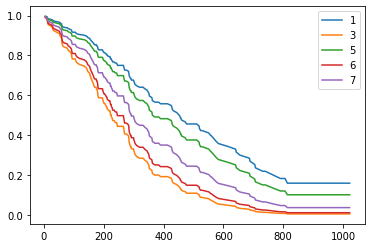

In [12]:
d_data = data.iloc[0:5,:]
cph.predict_survival_function(d_data).plot()

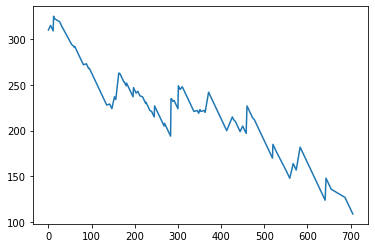

In [13]:
CTE = kmf.conditional_time_to_event_
plt.plot(CTE)

<AxesSubplot:xlabel='log(HR) (95% CI)'>

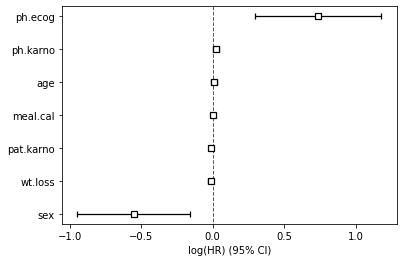

In [14]:
cph.plot()